In [541]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [542]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [543]:
## Reading the dataset

bike=pd.read_csv('C:/Users/a488531/Downloads/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [544]:
## Checking for nulls in all columns
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no nulls in any columns

In [545]:
## Understanding the skewness 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [546]:
## Checking for correct datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [547]:
# Checking the number of rows and columns
bike.shape

(730, 16)

In [548]:
## Instant, dteday,casual and registered columns are not needed for modelling. 
##Instant is just a serial number, date is not required as the relevant parts of dates like month and year are covered in mnth and yr columns
## Sum of Casual and registered form column cnt. As cnt is out target variable already, we shouldn't include casual and registered in our model.
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


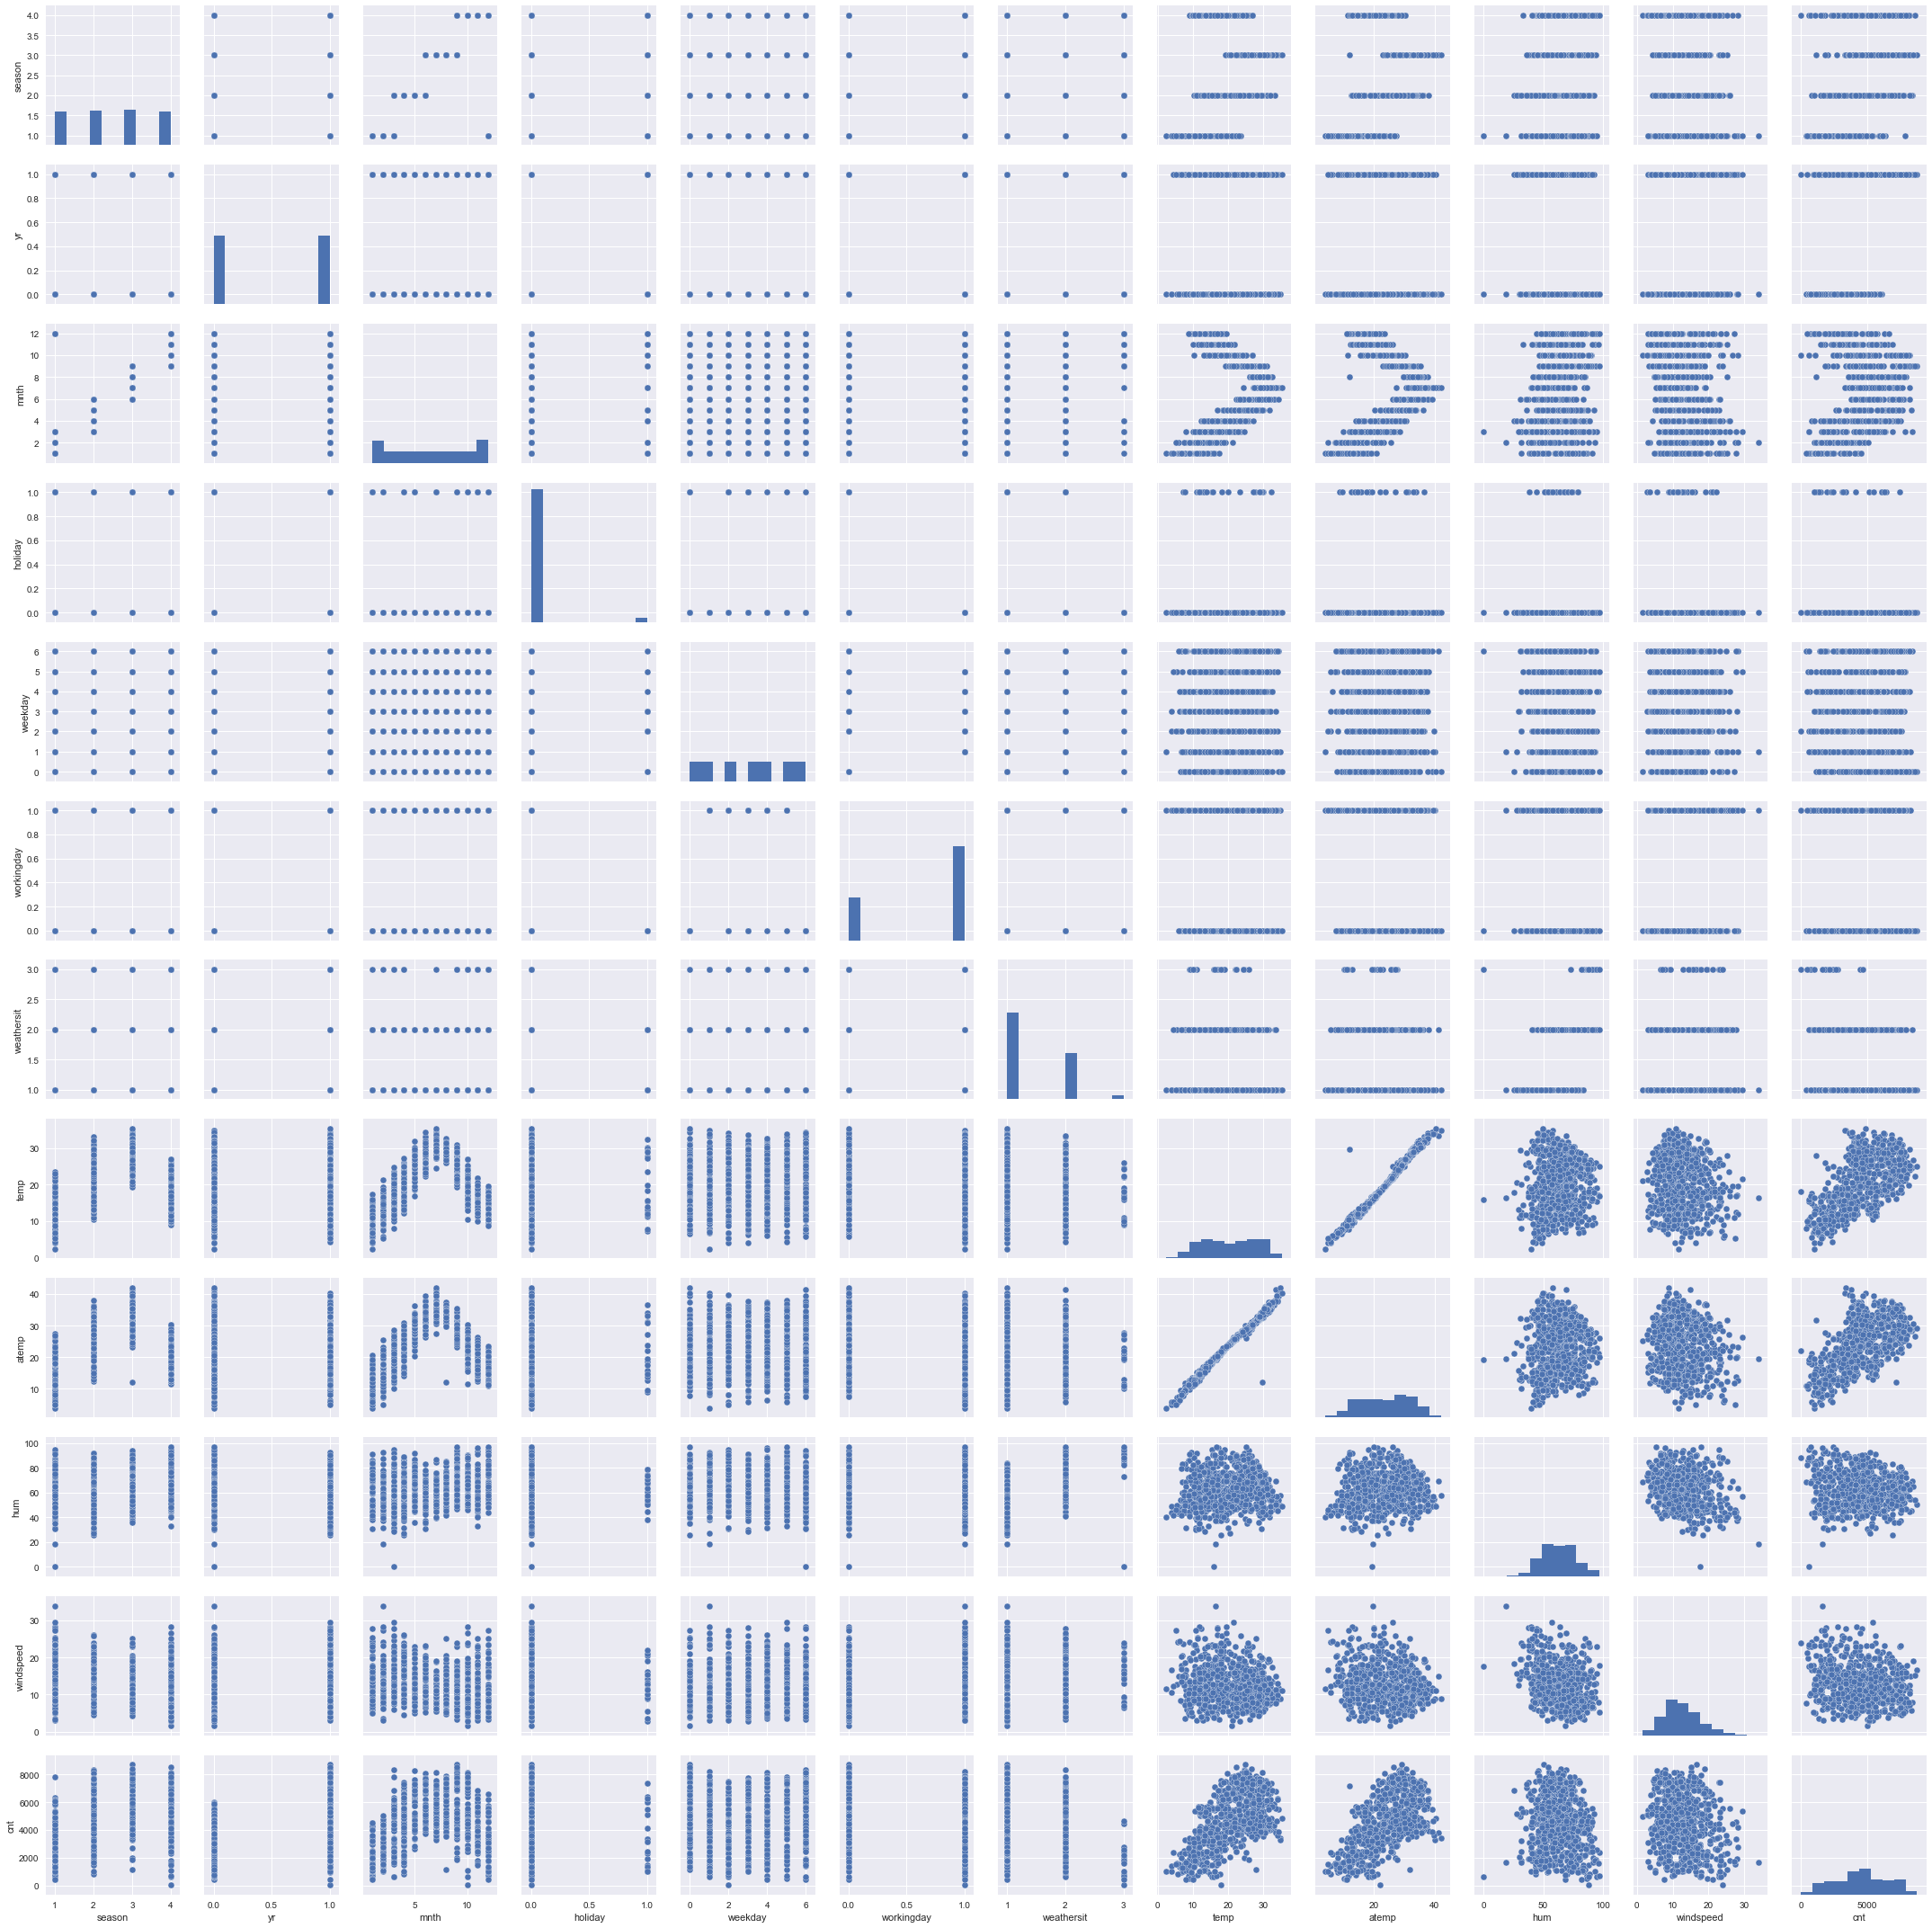

In [549]:
## Visualizing the relationship pairwise
sns.pairplot(bike)
plt.show()

We can notice that atemp vs temp seem to be diagonal line, which means there is a high correlation between these 2 variables. Also, our target variable 'cnt' is a numeric continuous variable, which means linear regression methodology could be used in this case.

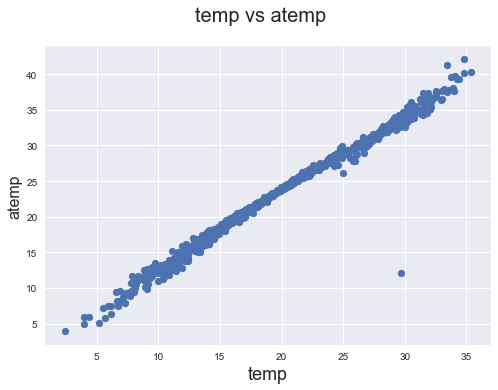

In [550]:
# Plotting temp vs atemp
fig = plt.figure()
plt.scatter(bike['temp'],bike['atemp'])
fig.suptitle('temp vs atemp', fontsize=20)              # Plot heading 
plt.xlabel('temp', fontsize=18)                          # X-label
plt.ylabel('atemp', fontsize=16)                          # Y-label
plt.show()

There seems to be a very high correlation between atemp and temp with a very few outliers. 

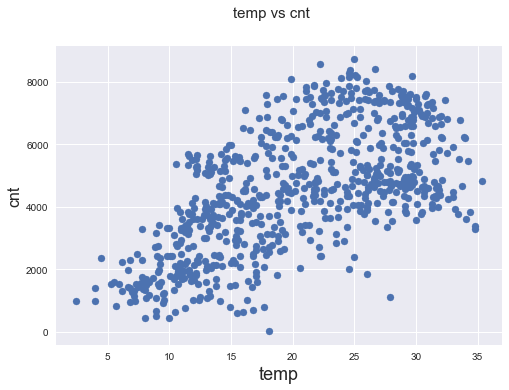

In [551]:
# Plotting temp vs count
fig = plt.figure()
plt.scatter(bike['temp'],bike['cnt'])
fig.suptitle('temp vs cnt', fontsize=15)              # Plot heading 
plt.xlabel('temp', fontsize=18)                          # X-label
plt.ylabel('cnt', fontsize=16)    
plt.show()

There seems to be some relation between these. Need to understand better by creating a model

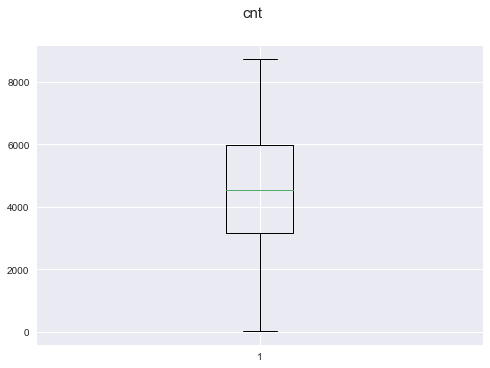

In [552]:
fig = plt.figure()
plt.boxplot(bike['cnt'])
fig.suptitle('cnt', fontsize=15)              # Plot heading    
plt.show()

Most total rental bikes counts lie between 3500 and 6000

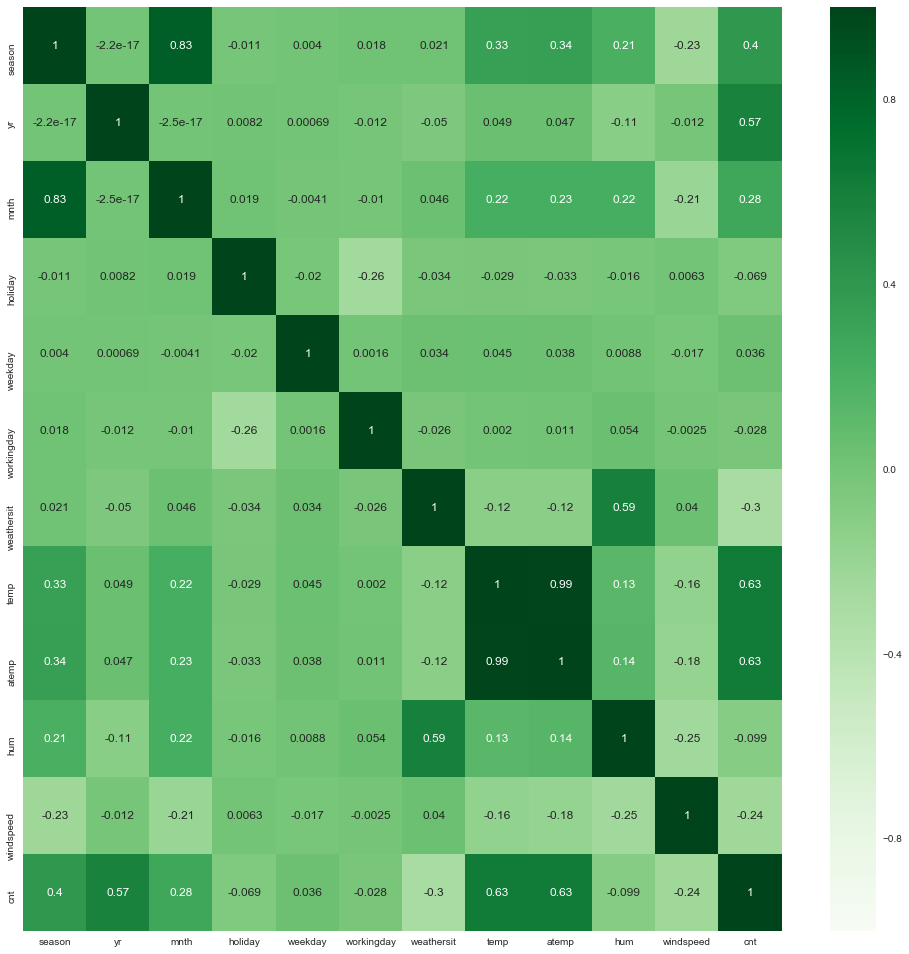

In [553]:
## Visualizing using a heatmap
plt.figure(figsize=(17,17))
sns.heatmap(bike.corr(), cmap='Greens', annot=True)
plt.show()

We see that 'temp', 'atemp' are highly correlated with each other. Also we can observe that 'temp', 'atemp' and 'yr' variables are most correlated with our target variable 'cnt'. Also, some other variables like season and mnth are positively correlated and variables like weathersit and windspeed are negatively correlated with cnt variable. 

Now let's create dummy variables for our categorical variables so that we can create our model

In [554]:
# Checking different values in column season
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [555]:
## Mapping season column values to actual seasons in order to create dummy variable in those names
bike['season']=bike['season'].astype(str)
bike['season']=bike['season'].map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [556]:
## Making sure all column values mapped correctly
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [557]:
## Creating dummy variables for season column
seas= pd.get_dummies(bike.season, drop_first=True)
seas.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [558]:
## Concatenate the seas columns to the bike dataframe
bike=pd.concat([bike,seas], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [559]:
## Dropping season column as we don't need it now
bike=bike.drop('season', axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [560]:
## Checking different values of column weathersit
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [561]:
## Even though we see that there are no cases of heavy rains, let's map all 4 values of weathersit column
bike['weathersit']=bike['weathersit'].astype(str)
bike['weathersit']=bike['weathersit'].map({'1':'Clear','2':'Mist','3':'Light_Snow','4':'Heavy_Rain'})
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [562]:
# create dummy values for weathersit
ws=pd.get_dummies(bike.weathersit,drop_first=True)
ws.head()

,Light_Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [563]:
## Adding the new dummy columns to the bike dataset
bike=pd.concat([bike,ws],axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist
0,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [564]:
# Dropping weathersit column as it is now irrelevant
bike=bike.drop('weathersit',axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [565]:
## Checking different values of column mnth
bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [566]:
# Mapping column names in order to create dummies
bike['mnth']=bike['mnth'].astype(str)
bike['mnth']=bike['mnth'].map({'1':'mnth_1','2':'mnth_2','3':'mnth_3','4':'mnth_4','5':'mnth_5','6':'mnth_6','7':'mnth_7','8':'mnth_8','9':'mnth_9','10':'mnth_10','11':'mnth_11','12':'mnth_12'})
bike.head()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist
0,0,mnth_1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,mnth_1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,mnth_1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,mnth_1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,mnth_1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [567]:
# Creating dummy variables
mnths=pd.get_dummies(bike.mnth,drop_first=True)
mnths.head()

,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [568]:
# Concatenating above columns to the main bike dataset
bike=pd.concat([bike,mnths],axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,mnth_1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,mnth_1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,mnth_1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,mnth_1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,mnth_1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [569]:
# Dropping the mnth column as it is not needed now
bike=bike.drop('mnth',axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [570]:
## Checking different values of column weekday
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [571]:
# Mapping weekday column values to better relevant names
bike['weekday']=bike['weekday'].astype(str)
bike['weekday']=bike['weekday'].map({'0':'Sunday','1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday'})
bike['weekday'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
Name: weekday, dtype: object

In [572]:
# Creating dummy columns
wday=pd.get_dummies(bike['weekday'],drop_first=True)
wday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [573]:
# Concatenating dummy columns to the main bike dataset
bike=pd.concat([bike,wday],axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Monday,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tuesday,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [574]:
# Dropping weekday column as it is irrelevant now
bike=bike.drop('weekday',axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [575]:
## Creating train and test datasets. This is done as we want to keep some data untouched and validate our model on that untouched data to check it's performance
bike_train,bike_test=train_test_split(bike,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


In [576]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [577]:
## As we can see that the scales of different numeric variables are different. 
## This will give us different results for coefficients which will be difficult to compare. Hence, scaling is needed.
## For those numeric variables which are not in 0-1 range, using mix max scaler will bring those numeric variables in range 0-1
scaler=MinMaxScaler()
# Create a list of numeric variables
vars_scale=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit on data
bike_train[vars_scale]=scaler.fit_transform(bike_train[vars_scale])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,0


In [578]:
# Defining X_train and y_train for modeling
y_train=bike_train.pop('cnt')
X_train=bike_train

As there are around 30 variables, using RFE approach to find the top 20 relevant variables first.

In [579]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [580]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [581]:
# Looking all the variables with their RFE ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', False, 8),
 ('mnth_2', False, 5),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 6),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('Monday', False, 4),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 10),
 ('Tuesday', False, 3),
 ('Wednesday', False, 9)]

In [582]:
# Listing columns which are shown relevant as per RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light_Snow', 'Mist', 'mnth_10', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'Saturday'],
      dtype='object')

In [583]:
# Listing columns which are shown irrelevant as per RFE
X_train.columns[~rfe.support_]

Index(['mnth_11', 'mnth_12', 'mnth_2', 'mnth_7', 'Monday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [584]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [585]:
# Adding a constant variable  
X_train_rfe_with_c = sm.add_constant(X_train_rfe)

In [586]:
# Fitting the model
lm = sm.OLS(y_train,X_train_rfe_with_c).fit()

In [587]:
# Printing summary to view model performance
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          5.88e-185
Time:                        12:10:36   Log-Likelihood:                 518.23
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     489   BIC:                            -905.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2970      0.037      7.974      0.0

In [588]:
## Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,401.57
4,atemp,379.65
5,hum,31.80
8,summer,8.38
2,workingday,5.95
6,windspeed,5.23
7,spring,5.10
9,winter,4.60
15,mnth_5,3.67
14,mnth_4,3.35


Using the reverse methodology to remove 1 variable at a time to reach a level where all p-values are within 5% significance level and VIF less than 5


In [589]:
# Here is the preference order for removing columns:
# 1. High p-value, High VIF 
# 2. High p-value, Low VIF 
# 3. Low p-value, High VIF
# 4. Low p-value, Low VIF

# p-value considered good are < 0.05 and VIF < 5

We can see that atemp variable has p-value > 0.05 and vif > 5

In [590]:
# Dropping atemp column
X=X_train_rfe.drop('atemp', axis=1)

In [591]:
## Training the model
X_train_sm=sm.add_constant(X)

## Create a model
lr=sm.OLS(y_train,X_train_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.1
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          5.21e-186
Time:                        12:10:36   Log-Likelihood:                 518.16
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     490   BIC:                            -911.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2967      0.037      7.975      0.000         0.224     0.370
yr             0.2307      0.008     28.522      0.000         0.215     0.247
holiday       -0.1040      0.027     -3.845      0.000        -0.157    -0.051
workingday    -0.0224      0.012     -1.907      0.057        -0.046     0.001
temp           0.4640      0.037     12.467      0.000         0.391     0.537
hum           -0.1651      0.038     -4.327      0.000        -0.240    -0.090
windspeed     -0.1838      0.026     -7.137      0.000        -0.234    -0.133
spring        -0.0473      0.023     -2.038      0.042        -0.093    -0.002
summer         0.0438      0.024      1.791      0.074        -0.004     0.092
winter         0.1117      0.020      5.523      0.000         0.072     0.151
Light_Snow    -0.2455      0.026     -9.303      0.000        -0.297    -0.194
Mist          -0.0572      0.010     -5.464      0.000        -0.078    -0.037
mnth_10        0.0434      0.018      2.461      0.014         0.009     0.078
mnth_3         0.0480      0.017      2.830      0.005         0.015     0.081
mnth_4         0.0408      0.026      1.579      0.115        -0.010     0.092
mnth_5         0.0653      0.026      2.478      0.014         0.014     0.117
mnth_6         0.0424      0.023      1.871      0.062        -0.002     0.087
mnth_8         0.0605      0.018      3.335      0.001         0.025     0.096
mnth_9         0.1269      0.018      7.219      0.000         0.092     0.161
Saturday      -0.0076      0.015     -0.495      0.621        -0.038     0.022
==============================================================================
Omnibus:                       77.844   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.071
Skew:                          -0.786   Prob(JB):                     5.33e-42
Kurtosis:                       5.545   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [592]:
# Calculating VIF to confirm which predictor can be explained using other set of predictors.
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,31.75
3,temp,19.22
7,summer,8.33
2,workingday,5.95
6,spring,5.04
5,windspeed,4.95
8,winter,4.51
14,mnth_5,3.67
13,mnth_4,3.34
15,mnth_6,2.50


In [593]:
## Dropping summer as it is high p-value and high VIF
X=X.drop('summer', axis=1)

In [594]:
## Training the model
X_train_sm=sm.add_constant(X)

## Create  a model
lr=sm.OLS(y_train,X_train_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.05e-186
Time:                        12:10:36   Log-Likelihood:                 516.49
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     491   BIC:                            -914.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3195      0.035      9.121      0.000         0.251     0.388
yr             0.2316      0.008     28.623      0.000         0.216     0.247
holiday       -0.1024      0.027     -3.779      0.000        -0.156    -0.049
workingday    -0.0223      0.012     -1.888      0.060        -0.045     0.001
temp           0.4330      0.033     13.113      0.000         0.368     0.498
hum           -0.1563      0.038     -4.121      0.000        -0.231    -0.082
windspeed     -0.1808      0.026     -7.022      0.000        -0.231    -0.130
spring        -0.0715      0.019     -3.787      0.000        -0.109    -0.034
winter         0.0947      0.018      5.291      0.000         0.060     0.130
Light_Snow    -0.2484      0.026     -9.411      0.000        -0.300    -0.197
Mist          -0.0576      0.010     -5.490      0.000        -0.078    -0.037
mnth_10        0.0463      0.018      2.631      0.009         0.012     0.081
mnth_3         0.0625      0.015      4.177      0.000         0.033     0.092
mnth_4         0.0703      0.020      3.516      0.000         0.031     0.110
mnth_5         0.0988      0.019      5.328      0.000         0.062     0.135
mnth_6         0.0649      0.019      3.427      0.001         0.028     0.102
mnth_8         0.0554      0.018      3.083      0.002         0.020     0.091
mnth_9         0.1218      0.017      7.006      0.000         0.088     0.156
Saturday      -0.0071      0.015     -0.461      0.645        -0.037     0.023
==============================================================================
Omnibus:                       79.329   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.240
Skew:                          -0.787   Prob(JB):                     2.00e-44
Kurtosis:                       5.645   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [595]:
# Calculating VIF
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,27.71
3,temp,16.93
2,workingday,5.89
5,windspeed,4.75
7,winter,3.93
6,spring,3.77
9,Mist,2.34
0,yr,2.09
15,mnth_8,1.95
17,Saturday,1.85


In [596]:
## Dropping Saturday as it is high p-value and high VIF
X=X.drop('Saturday', axis=1)

In [597]:
## Training the model
X_train_sm=sm.add_constant(X)

## Create  a model
lr=sm.OLS(y_train,X_train_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.78e-187
Time:                        12:10:36   Log-Likelihood:                 516.38
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     492   BIC:                            -920.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3163      0.034      9.224      0.000         0.249     0.384
yr             0.2317      0.008     28.672      0.000         0.216     0.248
holiday       -0.0995      0.026     -3.777      0.000        -0.151    -0.048
workingday    -0.0188      0.009     -2.062      0.040        -0.037    -0.001
temp           0.4328      0.033     13.119      0.000         0.368     0.498
hum           -0.1564      0.038     -4.125      0.000        -0.231    -0.082
windspeed     -0.1806      0.026     -7.020      0.000        -0.231    -0.130
spring        -0.0718      0.019     -3.802      0.000        -0.109    -0.035
winter         0.0944      0.018      5.282      0.000         0.059     0.129
Light_Snow    -0.2489      0.026     -9.446      0.000        -0.301    -0.197
Mist          -0.0575      0.010     -5.486      0.000        -0.078    -0.037
mnth_10        0.0464      0.018      2.640      0.009         0.012     0.081
mnth_3         0.0624      0.015      4.176      0.000         0.033     0.092
mnth_4         0.0700      0.020      3.507      0.000         0.031     0.109
mnth_5         0.0985      0.019      5.319      0.000         0.062     0.135
mnth_6         0.0648      0.019      3.425      0.001         0.028     0.102
mnth_8         0.0551      0.018      3.073      0.002         0.020     0.090
mnth_9         0.1217      0.017      7.007      0.000         0.088     0.156
==============================================================================
Omnibus:                       78.296   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.182
Skew:                          -0.778   Prob(JB):                     9.23e-44
Kurtosis:                       5.628   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [598]:
# Calculating VIF
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,27.16
3,temp,16.57
5,windspeed,4.73
7,winter,3.84
2,workingday,3.67
6,spring,3.66
9,Mist,2.33
0,yr,2.09
15,mnth_8,1.95
13,mnth_5,1.78


In [599]:
## Dropping hum as it is high p-value and high VIF
X=X.drop('hum', axis=1)

In [600]:
## Training the model
X_train_sm=sm.add_constant(X)

## Create  a model
lr=sm.OLS(y_train,X_train_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          5.61e-185
Time:                        12:10:37   Log-Likelihood:                 507.71
No. Observations:                 510   AIC:                            -981.4
Df Residuals:                     493   BIC:                            -909.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2348      0.028      8.244      0.000         0.179     0.291
yr             0.2351      0.008     28.775      0.000         0.219     0.251
holiday       -0.1024      0.027     -3.826      0.000        -0.155    -0.050
workingday    -0.0217      0.009     -2.345      0.019        -0.040    -0.004
temp           0.4062      0.033     12.355      0.000         0.342     0.471
windspeed     -0.1517      0.025     -6.031      0.000        -0.201    -0.102
spring        -0.0772      0.019     -4.034      0.000        -0.115    -0.040
winter         0.0843      0.018      4.688      0.000         0.049     0.120
Light_Snow    -0.2911      0.025    -11.802      0.000        -0.340    -0.243
Mist          -0.0822      0.009     -9.406      0.000        -0.099    -0.065
mnth_10        0.0434      0.018      2.430      0.015         0.008     0.078
mnth_3         0.0633      0.015      4.172      0.000         0.034     0.093
mnth_4         0.0703      0.020      3.464      0.001         0.030     0.110
mnth_5         0.0880      0.019      4.723      0.000         0.051     0.125
mnth_6         0.0694      0.019      3.616      0.000         0.032     0.107
mnth_8         0.0541      0.018      2.967      0.003         0.018     0.090
mnth_9         0.1158      0.018      6.583      0.000         0.081     0.150
==============================================================================
Omnibus:                       78.700   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.564
Skew:                          -0.790   Prob(JB):                     5.64e-43
Kurtosis:                       5.581   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [601]:
# Calculating VIF
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,7.45
4,windspeed,4.71
2,workingday,3.50
6,winter,2.55
5,spring,2.31
0,yr,2.09
14,mnth_8,1.93
13,mnth_6,1.69
12,mnth_5,1.62
9,mnth_10,1.60


In [602]:
## Dropping temp as it is high p-value and high VIF
X=X.drop('temp', axis=1)

In [603]:
## Training the model
X_train_sm=sm.add_constant(X)

## Create  a model
lr=sm.OLS(y_train,X_train_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     125.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.45e-157
Time:                        12:10:37   Log-Likelihood:                 438.92
No. Observations:                 510   AIC:                            -845.8
Df Residuals:                     494   BIC:                            -778.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5230      0.019     28.002      0.000         0.486     0.560
yr             0.2478      0.009     26.748      0.000         0.230     0.266
holiday       -0.1023      0.031     -3.344      0.001        -0.162    -0.042
workingday    -0.0250      0.011     -2.364      0.018        -0.046    -0.004
windspeed     -0.1669      0.029     -5.810      0.000        -0.223    -0.110
spring        -0.2351      0.016    -14.451      0.000        -0.267    -0.203
winter        -0.0366      0.017     -2.120      0.035        -0.070    -0.003
Light_Snow    -0.3048      0.028    -10.818      0.000        -0.360    -0.249
Mist          -0.0961      0.010     -9.698      0.000        -0.116    -0.077
mnth_10        0.0968      0.020      4.888      0.000         0.058     0.136
mnth_3         0.0516      0.017      2.982      0.003         0.018     0.086
mnth_4        -0.0096      0.022     -0.435      0.664        -0.053     0.034
mnth_5         0.0725      0.021      3.412      0.001         0.031     0.114
mnth_6         0.0985      0.022      4.524      0.000         0.056     0.141
mnth_8         0.0968      0.020      4.732      0.000         0.057     0.137
mnth_9         0.1425      0.020      7.140      0.000         0.103     0.182
==============================================================================
Omnibus:                       58.460   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.862
Skew:                          -0.588   Prob(JB):                     1.29e-32
Kurtosis:                       5.351   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [604]:
# calculating VIF
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,4.16
2,workingday,3.12
5,winter,2.54
4,spring,2.28
0,yr,1.93
8,mnth_10,1.56
7,Mist,1.55
10,mnth_4,1.55
11,mnth_5,1.42
13,mnth_8,1.41


In [605]:
## Dropping mnth_4 as it is high p-value
X=X.drop('mnth_4', axis=1)

In [606]:
## Training the model
X_train_sm=sm.add_constant(X)

## Create  a model
lr=sm.OLS(y_train,X_train_sm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.28e-158
Time:                        12:10:37   Log-Likelihood:                 438.83
No. Observations:                 510   AIC:                            -847.7
Df Residuals:                     495   BIC:                            -784.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5201      0.017     29.960      0.000         0.486     0.554
yr             0.2476      0.009     26.776      0.000         0.229     0.266
holiday       -0.1024      0.031     -3.350      0.001        -0.162    -0.042
workingday    -0.0251      0.011     -2.377      0.018        -0.046    -0.004
windspeed     -0.1692      0.028     -6.001      0.000        -0.225    -0.114
spring        -0.2315      0.014    -16.556      0.000        -0.259    -0.204
winter        -0.0330      0.015     -2.173      0.030        -0.063    -0.003
Light_Snow    -0.3045      0.028    -10.819      0.000        -0.360    -0.249
Mist          -0.0963      0.010     -9.731      0.000        -0.116    -0.077
mnth_10        0.0972      0.020      4.915      0.000         0.058     0.136
mnth_3         0.0534      0.017      3.180      0.002         0.020     0.086
mnth_5         0.0765      0.019      3.976      0.000         0.039     0.114
mnth_6         0.1024      0.020      5.164      0.000         0.063     0.141
mnth_8         0.1007      0.018      5.458      0.000         0.064     0.137
mnth_9         0.1455      0.019      7.780      0.000         0.109     0.182
==============================================================================
Omnibus:                       57.477   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.234
Skew:                          -0.581   Prob(JB):                     7.89e-32
Kurtosis:                       5.322   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
# Calculating VIF
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,3.45
2,workingday,2.99
5,winter,2.22
4,spring,1.90
0,yr,1.88
8,mnth_10,1.56
7,Mist,1.53
9,mnth_3,1.28
10,mnth_5,1.28
12,mnth_8,1.28


This seems to be our final model as all the column p-values are <0.05, VIFs are less than 5 and adj R squared = 0.786 which looks good. Adj R squared = 0.786 means that 78.6% of the variance in y can be explained by predictors

In [608]:
# Residual Analysis
y_train_pred=lr.predict(X_train_sm)

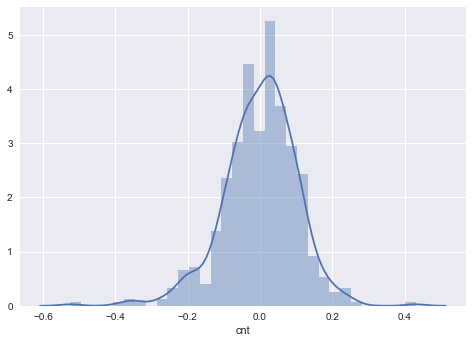

In [609]:
# Plotting residual which is a difference of y_train and predicted value if y
res=y_train - y_train_pred
sns.distplot(res)
plt.show()

We can see that the residuals are forming a normal distribution.

Predicting and evaluating the test dataset


In [610]:
## Printing test dataset
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,1,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,1,0,0,0,0,1,0,0,0,0


In [611]:
# Using same preprocessing steps for the test dataset
# Scaling test set
bike_test[vars_scale]=scaler.transform(bike_test[vars_scale])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,1,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,1,0,0,0,0,1,0,0,0,0


In [612]:
# Verifying if scaling has perfomed properly or not
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.095455,0.104545,0.059091,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.294512,0.306665,0.236333,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [613]:
# Creating y_test and X_test the same way as we did in the train dataset
y_test=bike_test.pop('cnt')
X_test=bike_test

In [614]:
## Adding a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,mnth_6,mnth_7,mnth_8,mnth_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,1,0,0,0,0,0,0,1,0,0
299,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,1,0,0,0,0
221,1,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,1,0,0,0,0,0,0,0
152,1,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,1,0,0,0,0,1,0,0,0,0


In [615]:
# Dropping the variables which are not a part of our model
X_test_sm=X_test_sm.drop(['mnth_4','Saturday','summer','temp','atemp','hum','mnth_11', 'mnth_12', 'mnth_2', 'mnth_7', 'Monday', 'Sunday','Thursday', 'Tuesday', 'Wednesday'], axis=1)
X_test_sm.head()

,const,yr,holiday,workingday,windspeed,spring,winter,Light_Snow,Mist,mnth_10,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9
184,1,0,1,0,0.084219,0,0,0,1,0,0,0,0,0,0
535,1,1,0,1,0.153728,0,0,0,0,0,0,0,1,0,0
299,1,0,0,0,0.334206,0,1,0,1,1,0,0,0,0,0
221,1,0,0,1,0.339570,0,0,0,0,0,0,0,0,1,0
152,1,0,0,0,0.537414,0,0,0,0,0,0,0,1,0,0


In [616]:
# Predict
y_test_pred=lr.predict(X_test_sm)

In [617]:
# Evaluate the model using r2 score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.77629654641189738

We can see that R2 value has come out to be 0.776 which very close to the adj R square value 0.786 that we got in our training dataset. Hence, this model seems good.

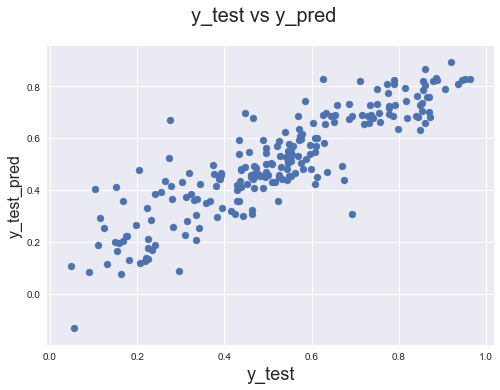

In [618]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                     # Y-label
plt.show()

Hence, the final model is :
cnt=0.5201
+yr(0.2476)
+holiday(-0.1024)
+workingday(-0.0251)
+windspeed(-0.1692)
+spring(-0.2315)
+winter(-0.033)
+Light_Snow(-0.3045)
+Mist(-0.0963)
+mnth_10(0.0972)
+mnth_3(0.0534)
+mnth_5(0.0765)
+mnth_6(0.1024)
+mnth_8(0.1007)
+mnth_9(0.1455)


Columns mnth_10,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,yr positively impact the count of total rental bikes including both casual and registered 
and 
columns holiday,workingday,windspeed,spring,winter,Light_Snow,Mist negatively impact the count of total rental bikes including both casual and registered
